# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# api.openweathermap.org/data/2.5/weather?id={city id}&appid={your api key}
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=4f7d4d7ae256c377cecece7ed397bf73&units=imperial&q='

In [5]:
# Looping through the Data and adding it to my list
response = []
for city in cities:
    response.append(requests.get(query_url + city).json())
    # Printing the log of the data being processed
    print("Processing Record"+ " " + str(cities.index(city)) + " | " + city  )


Processing Record 0 | kieta
Processing Record 1 | yellowknife
Processing Record 2 | burns lake
Processing Record 3 | rikitea
Processing Record 4 | tasiilaq
Processing Record 5 | artyk
Processing Record 6 | cape town
Processing Record 7 | moron
Processing Record 8 | wum
Processing Record 9 | carnarvon
Processing Record 10 | saleaula
Processing Record 11 | kodiak
Processing Record 12 | albany
Processing Record 13 | margate
Processing Record 14 | port-gentil
Processing Record 15 | torbay
Processing Record 16 | ahipara
Processing Record 17 | ushuaia
Processing Record 18 | puerto ayora
Processing Record 19 | tuktoyaktuk
Processing Record 20 | vila velha
Processing Record 21 | gamboma
Processing Record 22 | punta arenas
Processing Record 23 | belushya guba
Processing Record 24 | hermanus
Processing Record 25 | bluff
Processing Record 26 | los zacatones
Processing Record 27 | lasa
Processing Record 28 | vaini
Processing Record 29 | chengde
Processing Record 30 | atuona
Processing Record 31 | 

In [6]:
# Looking at my list of dictionaries
response

[{'coord': {'lon': 155.63, 'lat': -6.22},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 84.69,
   'feels_like': 91.92,
   'temp_min': 84.69,
   'temp_max': 84.69,
   'pressure': 1005,
   'humidity': 69,
   'sea_level': 1005,
   'grnd_level': 1002},
  'wind': {'speed': 3.87, 'deg': 356},
  'clouds': {'all': 100},
  'dt': 1582692212,
  'sys': {'country': 'PG', 'sunrise': 1582659801, 'sunset': 1582703886},
  'timezone': 39600,
  'id': 2094027,
  'name': 'Kieta',
  'cod': 200},
 {'coord': {'lon': -114.35, 'lat': 62.46},
  'weather': [{'id': 600,
    'main': 'Snow',
    'description': 'light snow',
    'icon': '13n'}],
  'base': 'stations',
  'main': {'temp': -2.07,
   'feels_like': -12.55,
   'temp_min': -2.2,
   'temp_max': -2,
   'pressure': 1024,
   'humidity': 77},
  'visibility': 24140,
  'wind': {'speed': 6.93, 'deg': 80},
  'clouds': {'all': 75},
  'dt': 1582692212,
  'sys': {'type'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Creating Empty Lists for my DF

place = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []

for location in response:
    try:
        # Adding the names of the cities to my name list
        place.append(location['name'])
        # adding cloudiness to the list
        cloudiness.append(location['clouds']['all'])
        # adding country to the list
        country.append(location['sys']['country'])
        # adding date to the list
        date.append(location['dt'])
        # adding humidity to the list
        humidity.append(location['main']['humidity'])
        # adding latitude to the list
        latitude.append(location['coord']['lat'])
        # adding long to the list
        longitude.append(location['coord']['lon'])
        # adding max_temp to the list
        max_temp.append(location['main']['temp_max'])
        # adding windspeed to the list
        wind_speed.append(location['wind']['speed'])
    except KeyError:
        pass

# Turning the lists into a dataframe
    
dfs = pd.DataFrame({'City': place, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity, "Latitude": latitude, "Longitude": longitude, "Max Temp": max_temp, "Wind Speed": wind_speed})
dfs


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Kieta,100,PG,1582692212,69,-6.22,155.63,84.69,3.87
1,Yellowknife,75,CA,1582692212,77,62.46,-114.35,-2.00,6.93
2,Burns Lake,56,CA,1582692213,96,54.23,-125.75,24.85,4.43
3,Rikitea,100,PF,1582692213,70,-23.12,-134.97,80.17,6.08
4,Tasiilaq,100,GL,1582692213,61,65.61,-37.64,12.20,8.05
...,...,...,...,...,...,...,...,...,...
552,Nantucket,90,US,1582692340,100,41.28,-70.10,44.60,11.74
553,Chimbote,0,PE,1582692110,84,-9.09,-78.58,72.00,1.81
554,Hobyo,67,SO,1582692341,63,5.35,48.53,82.02,19.98
555,Hirara,75,JP,1582692341,69,24.80,125.28,78.80,9.17


In [8]:
# Exporting Dataframe as CSV
dfs.to_csv(r'export_dataframe.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

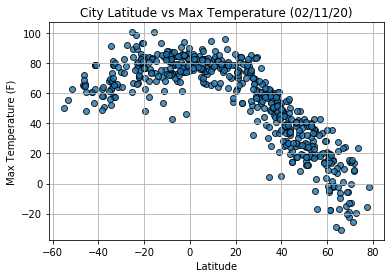

In [9]:
# Creating my open canvas

fig, ax = plt.subplots()
ax.scatter(latitude, max_temp, edgecolors = "black", alpha = 0.8)

fig;

# Creating my grid and labels

ax.set(xlabel = "Latitude", ylabel="Max Temperature (F)", title="City Latitude vs Max Temperature (02/11/20)");
ax.grid('on', which='major')

# Trend 1

Here, we can see that as latitude approaches zero, Temperatures rise. In other words, as you get closer to the equator, it get's hotter. Conversely, as you get further from the equator, temperatures decrease.

In [10]:
#Save the Figure
import os
path = os.path.join(os.path.expanduser("~"), "Desktop", "Lat vs MaxTemp.png")
path
fig.savefig(path)

#### Latitude vs. Humidity Plot

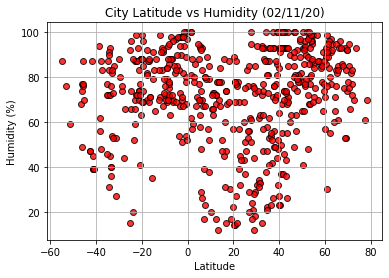

In [11]:
# Creating my open canvas

fig2, ax2 = plt.subplots()
ax2.scatter(latitude, humidity, edgecolors = "black", c= "red", alpha = 0.8)

fig2;

# Creating my grid and labels

ax2.set(xlabel = "Latitude", ylabel="Humidity (%)", title="City Latitude vs Humidity (02/11/20)");
ax2.grid('on', which='major')

# Trend 2

At latitudes below zero, in the southern hemisphere, you are more likely to have higher humidity. Additionally, between 20 degrees latitude and 40 degrees latitude (i.e. imagine the lower border of the US, and the northern border of the US run parrallel accross the globe) there is a large disitribution of humidities. This means that you could be in that region and experience 90% humidity levels, and someone on the same latitude could experience 5% humidity levels. 

In [12]:
#Save the Figure
import os
path = os.path.join(os.path.expanduser("~"), "Desktop", "Lat vs Humidity.png")
path
fig2.savefig(path)

#### Latitude vs. Cloudiness Plot

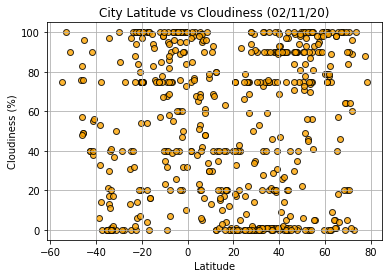

In [13]:
# Creating my open canvas
fig3, ax3 = plt.subplots()
ax3.scatter(latitude, cloudiness, edgecolors = "black", c= "orange", alpha = 0.8)

fig3;

# Creating my grid and labels

ax3.set(xlabel = "Latitude", ylabel="Cloudiness (%)", title="City Latitude vs Cloudiness (02/11/20)");
ax3.grid('on', which='major')

In [191]:
#Save the Figure
import os
path = os.path.join(os.path.expanduser("~"), "Desktop", "Lat vs Cloudiness.png")
path
fig3.savefig(path)

#### Latitude vs. Wind Speed Plot

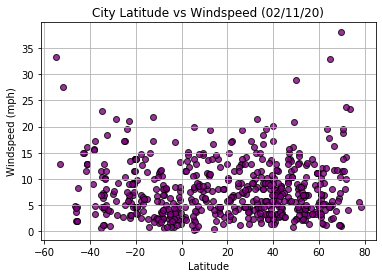

In [14]:
# Creating my open canvas
fig4, ax4 = plt.subplots()
ax4.scatter(latitude, wind_speed, edgecolors = "black", c= "purple", alpha = 0.8)

fig4;

# Creating my grid and labels

ax4.set(xlabel = "Latitude", ylabel="Windspeed (mph)", title="City Latitude vs Windspeed (02/11/20)");
ax4.grid('on', which='major')

# Trend 3

In this graph, you can see that if you closer to the equator, you are more likely to have slower windspeeds. However, as you get further and further away from the equator, there is a greater possibility that you are in a city with higher windspeeds.
This makes sense, because windspeed is mostly affected by atmospheric pressure and temperature. As we have seen in 'trend 1', the further you are from the equator, the lower the temperature. The lower the temperature, the higher the likelihood of higher windspeeds.

In [193]:
#Save the Figure
import os
path = os.path.join(os.path.expanduser("~"), "Desktop", "Lat vs Windspeed.png")
path
fig4.savefig(path)